In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from keras.layers import Dense, Flatten
from keras.models import Model #functional API
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import tensorflow.keras as keras
import numpy as np



In [2]:
base_model = InceptionV3(input_shape=(256,256,3), include_top = False)

In [3]:
for layer in base_model.layers:
  layer.trainable = False

In [4]:
X = Flatten()(base_model.output)
X = Dense(units = 6, activation='sigmoid')(X)

#final_model
model = Model(base_model.input, X)
model.compile(optimizer= 'adam', loss =keras.losses.binary_crossentropy, metrics = ['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [5]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rotation_range=0.4,
                                   width_shift_range= 0.3, 
                                   horizontal_flip=True, 
                                   preprocessing_function=preprocess_input, 
                                   zoom_range = 0.4, 
                                   shear_range = 0.4)

In [14]:
train_data = train_datagen.flow_from_directory(directory="C:/Users/user/OneDrive - Amrita university/S6/Currency/data_set",
                                               target_size=(256, 256),
                                               batch_size=64)


Found 2107 images belonging to 6 classes.


In [15]:
train_data.class_indices

{'10': 0, '100': 1, '20': 2, '200': 3, '50': 4, '500': 5}

In [16]:
t_img, label = train_data.next()

c:\Python310\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [17]:
t_img

array([[[[ 0.4601786 ,  0.4993943 ,  0.53076684],
         [ 0.4780724 ,  0.5172881 ,  0.54866076],
         [ 0.50552034,  0.544736  ,  0.5761086 ],
         ...,
         [ 0.6313726 ,  0.6313726 ,  0.6313726 ],
         [ 0.6313726 ,  0.6313726 ,  0.6340536 ],
         [ 0.6313726 ,  0.6313726 ,  0.64503264]],

        [[ 0.46033144,  0.49954712,  0.5309197 ],
         [ 0.47832716,  0.51754284,  0.5489154 ],
         [ 0.5057751 ,  0.5449908 ,  0.5763633 ],
         ...,
         [ 0.6313726 ,  0.6313726 ,  0.6313726 ],
         [ 0.6313726 ,  0.6313726 ,  0.6341555 ],
         [ 0.6313726 ,  0.6313726 ,  0.6451347 ]],

        [[ 0.46048427,  0.49969995,  0.5310725 ],
         [ 0.4785819 ,  0.5177976 ,  0.54917014],
         [ 0.50602984,  0.5452455 ,  0.5766181 ],
         ...,
         [ 0.6313726 ,  0.6313726 ,  0.6313726 ],
         [ 0.6313726 ,  0.6313726 ,  0.6342573 ],
         [ 0.6313726 ,  0.6313726 ,  0.6452365 ]],

        ...,

        [[ 0.21945596,  0.25813317,  0

In [18]:
t_img.shape

(64, 256, 256, 3)

In [19]:
def plotImages(img_arr, label):
  for idx, img in enumerate(img_arr):
    if idx<=10:
      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


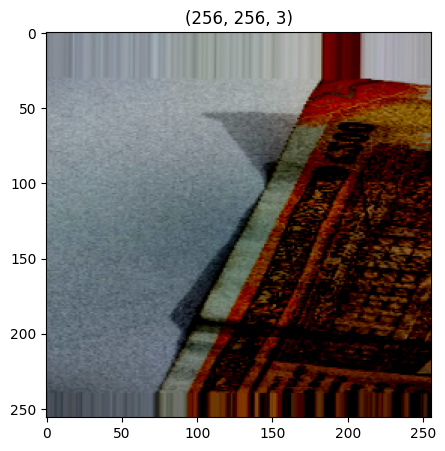

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


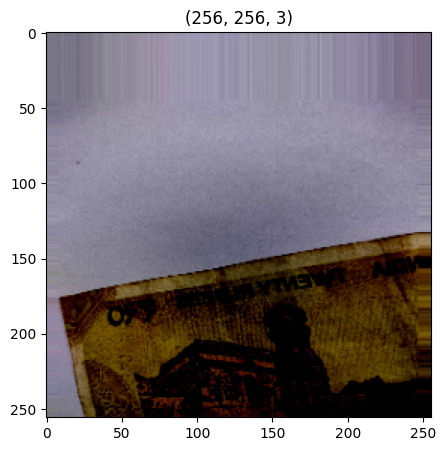

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


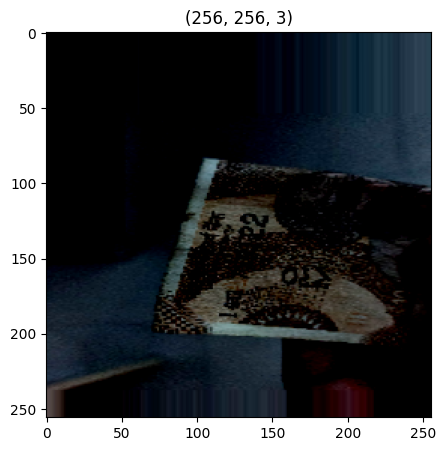

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


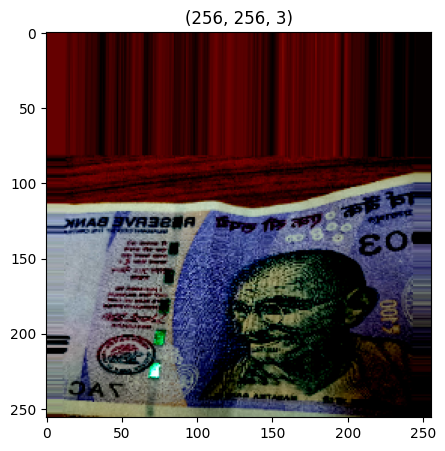

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


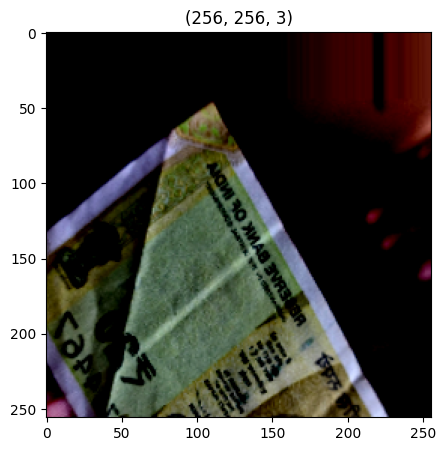

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


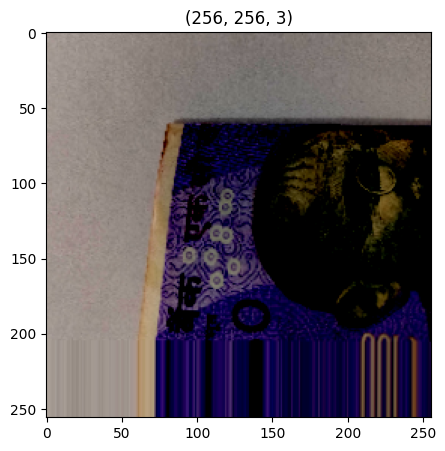

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


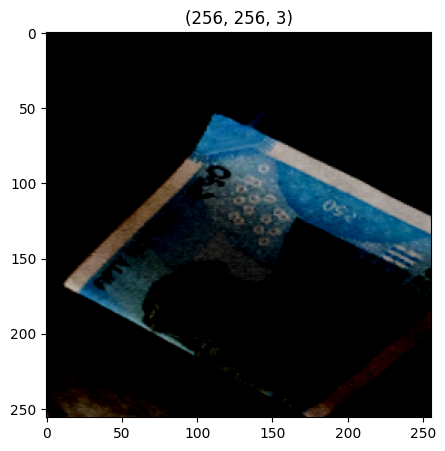

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


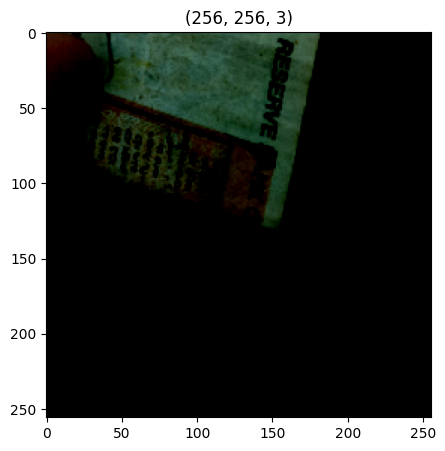

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


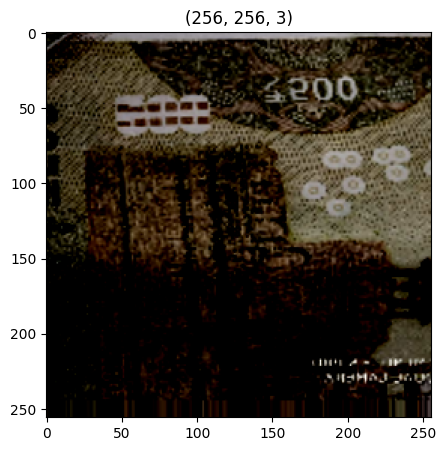

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


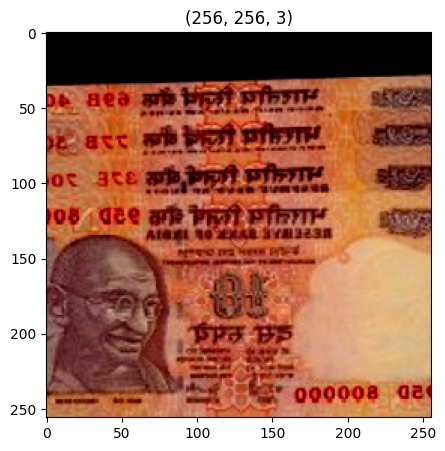

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


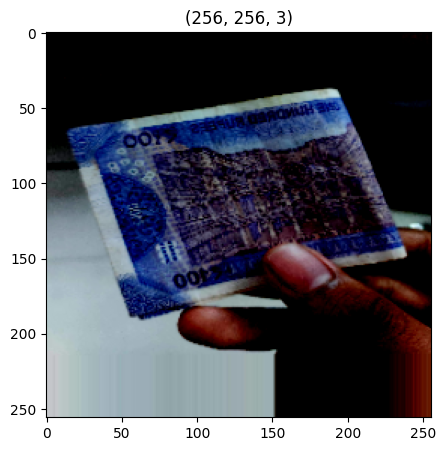

In [20]:
plotImages(t_img, label)

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="./best_model.h5",
                     monitor = "accuracy",
                     verbose=1,
                     save_best_only = True)
es = EarlyStopping(monitor = "accuracy",
                   min_delta=0.01,
                   patience=5,
                   verbose=1)
cb = [mc,es]


In [4]:
his= model.fit_generator(train_data,
                         steps_per_epoch=32,
                         epochs = 10,
                         callbacks = cb)

NameError: name 'train_data' is not defined

In [24]:
from keras.models import load_model
model = load_model("C:/Users/user/OneDrive - Amrita university/S6/Currency/best_model.h5")



In [25]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy'])

C:\Users\user\AppData\Local\Temp\ipykernel_13784\3314250192.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['loss'],'go--', c="red")
C:\Users\user\AppData\Local\Temp\ipykernel_13784\3314250192.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'], 'go--', c="green")


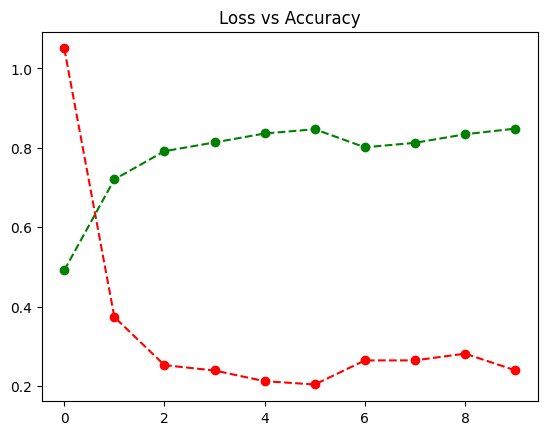

In [28]:
plt.plot(h['loss'],'go--', c="red")
plt.plot(h['accuracy'], 'go--', c="green")
plt.title("Loss vs Accuracy")
plt.show()

Validating the image


1/1 [==============================] - 0s 102ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


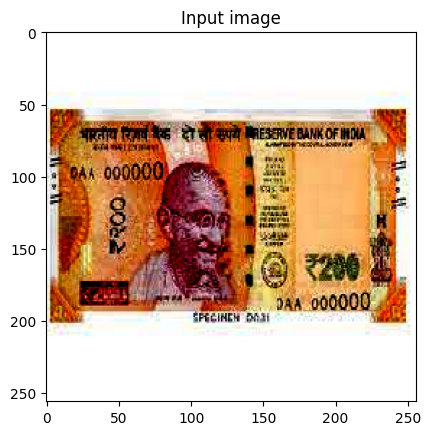

It is a 200 rupee note


In [49]:
path = "C:/Users/user/OneDrive - Amrita university/S6/Currency/test4.jpeg"
img = load_img(path, target_size = (256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape
pred =np.argmax(model.predict(input_arr))
#{'10': 0, '100': 1, '20': 2, '200': 3, '50': 4, '500': 5}

plt.imshow(input_arr[0])
plt.title("Input image")
plt.show()

if pred ==0:
    print("It is a 10 rupee note")
elif pred ==1:
    print("It is a 100 rupee note")
elif pred ==2:
    print("It is a 20 rupee note")
elif pred ==3:
    print("It is a 200 rupee note")
elif pred ==4:
    print("It is a 50 rupee note")
else:
    print("It is a 500 rupee note")



GRAD-CAM


In [45]:
def get_img_arr(img_path):
    path = img_path
    img = load_img
    img = img_to_array(img)
    img = preprocess_input(i)
    #expand the dimensions
    img = np.array([i])
    return img

In [46]:
import tensorflow as tf

In [50]:
def make_gradcam_heatmap(img_arr , model, last_conv_layer_name, pred_index = None):
    grad_model = tf.keras.models.Model(
        [model.input], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        last_conv_layer_output , preds = grad_model(img_arr)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])

        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel ,last_conv_layer_output )
    pooles_grads = tf.reduce_mean(grads, axis = (0,1,2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis ]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap,0)/ tf.math.reduce_max(heatmap)
    return heatmap.numpy()


    

Mask heatmap on Image


In [51]:
import matplotlib.cm as cm
from IPython.display import Image, display


In [ ]:
def save_and_display_gradcam(img_path, heatmap,cam_path="cam.jpg",alpha = 0.4):
    img = img_to_array(load_img(img_path))
    heatmap = np.uint8(255*heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arrange(256))[:,:3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha+img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    display(Image(cam_path))




In [ ]:
def image_prediction_and_visualization(path,last_conv_layer_name = "conv2d_93", model = model):
    img_array = get_img_array(path)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

In [2]:
import tensorflow as tf

In [3]:


# Load the TensorFlow SavedModel or Keras model
model = tf.keras.models.load_model("C:/Users/user/OneDrive - Amrita university/S6/Currency/best_model.h5")

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmput2bp1tv\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmput2bp1tv\assets
